In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 500
output_size = 10  # 10 classes for MNIST
num_epochs = 500
batch_size = 64
learning_rate = 1e-3
momentum = 0.9

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split dataset into training and validation sets (8:2)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network




In [2]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [3]:
def train(b,num_epochs):
    model = NeuralNet(input_size, hidden_size, output_size).to("cuda")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) 
    train_errors = []
    val_errors = []  
    for epoch in range(num_epochs):
        # print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to("cuda")
            outputs = model(images)
            labels = labels.to("cuda")
            # print(outputs.device)
            # print(labels.device)
            loss = criterion(outputs, labels)
            loss = abs(loss-b)+b
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_error = 100 * (1 - correct / total)
        train_errors.append(train_error)
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(-1, 28*28).to("cuda")
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                labels = labels.to("cuda")
                # print(predicted.device)
                # print(labels.device)
                correct += (predicted == labels).sum().item()
        
        val_error = 100 * (1 - correct / total)
        val_errors.append(val_error)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Error: {train_error:.2f}%, Validation Error: {val_error:.2f}%')
    plt.plot(train_errors, label='Train Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.savefig(f"new_train{b}.png")
    plt.show()


Epoch [1/50], Train Error: 19.81%, Validation Error: 11.30%
Epoch [2/50], Train Error: 10.89%, Validation Error: 10.04%
Epoch [3/50], Train Error: 9.68%, Validation Error: 9.33%
Epoch [4/50], Train Error: 8.92%, Validation Error: 8.73%
Epoch [5/50], Train Error: 8.25%, Validation Error: 7.96%
Epoch [6/50], Train Error: 7.69%, Validation Error: 7.62%
Epoch [7/50], Train Error: 7.15%, Validation Error: 7.14%
Epoch [8/50], Train Error: 6.70%, Validation Error: 6.62%
Epoch [9/50], Train Error: 6.35%, Validation Error: 6.18%
Epoch [10/50], Train Error: 5.93%, Validation Error: 6.06%
Epoch [11/50], Train Error: 5.52%, Validation Error: 5.79%
Epoch [12/50], Train Error: 5.29%, Validation Error: 5.55%
Epoch [13/50], Train Error: 5.06%, Validation Error: 5.43%
Epoch [14/50], Train Error: 4.79%, Validation Error: 5.33%
Epoch [15/50], Train Error: 4.64%, Validation Error: 5.05%
Epoch [16/50], Train Error: 4.47%, Validation Error: 4.85%
Epoch [17/50], Train Error: 4.27%, Validation Error: 4.60%
Ep

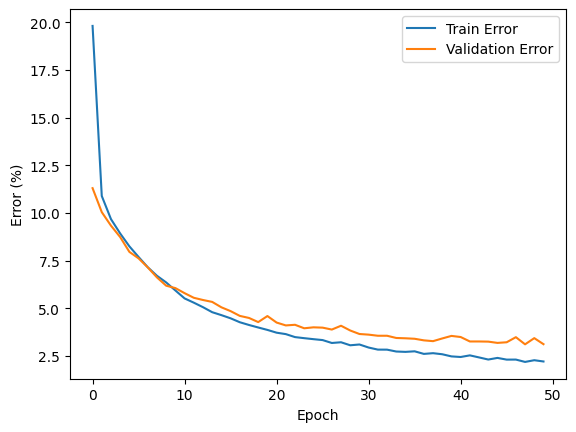

Epoch [1/50], Train Error: 19.46%, Validation Error: 11.98%
Epoch [2/50], Train Error: 10.77%, Validation Error: 9.81%
Epoch [3/50], Train Error: 9.53%, Validation Error: 8.93%
Epoch [4/50], Train Error: 8.81%, Validation Error: 8.49%
Epoch [5/50], Train Error: 8.20%, Validation Error: 8.19%
Epoch [6/50], Train Error: 7.69%, Validation Error: 7.36%
Epoch [7/50], Train Error: 7.14%, Validation Error: 6.92%
Epoch [8/50], Train Error: 6.65%, Validation Error: 6.52%
Epoch [9/50], Train Error: 6.26%, Validation Error: 6.43%
Epoch [10/50], Train Error: 5.86%, Validation Error: 5.80%
Epoch [11/50], Train Error: 5.55%, Validation Error: 5.73%
Epoch [12/50], Train Error: 5.16%, Validation Error: 5.33%
Epoch [13/50], Train Error: 5.03%, Validation Error: 5.36%
Epoch [14/50], Train Error: 4.72%, Validation Error: 5.20%
Epoch [15/50], Train Error: 4.63%, Validation Error: 4.92%
Epoch [16/50], Train Error: 4.40%, Validation Error: 4.78%
Epoch [17/50], Train Error: 4.18%, Validation Error: 4.62%
Epo

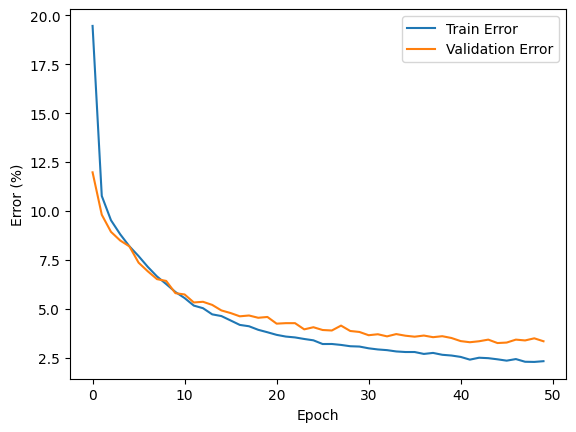

Epoch [1/50], Train Error: 19.45%, Validation Error: 11.72%
Epoch [2/50], Train Error: 10.95%, Validation Error: 10.32%
Epoch [3/50], Train Error: 9.57%, Validation Error: 9.18%
Epoch [4/50], Train Error: 8.84%, Validation Error: 8.35%
Epoch [5/50], Train Error: 8.26%, Validation Error: 7.93%
Epoch [6/50], Train Error: 7.71%, Validation Error: 7.55%
Epoch [7/50], Train Error: 7.23%, Validation Error: 7.15%
Epoch [8/50], Train Error: 6.80%, Validation Error: 6.63%
Epoch [9/50], Train Error: 6.42%, Validation Error: 6.40%
Epoch [10/50], Train Error: 5.99%, Validation Error: 6.09%
Epoch [11/50], Train Error: 5.74%, Validation Error: 6.21%
Epoch [12/50], Train Error: 5.45%, Validation Error: 5.76%
Epoch [13/50], Train Error: 5.17%, Validation Error: 5.41%
Epoch [14/50], Train Error: 4.88%, Validation Error: 5.34%
Epoch [15/50], Train Error: 4.79%, Validation Error: 5.16%
Epoch [16/50], Train Error: 4.63%, Validation Error: 4.97%
Epoch [17/50], Train Error: 4.40%, Validation Error: 4.98%
Ep

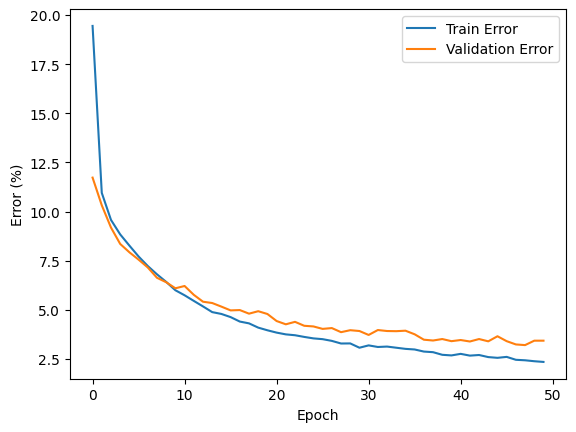

Epoch [1/50], Train Error: 19.02%, Validation Error: 11.48%
Epoch [2/50], Train Error: 10.77%, Validation Error: 9.73%
Epoch [3/50], Train Error: 9.57%, Validation Error: 8.95%
Epoch [4/50], Train Error: 8.70%, Validation Error: 8.65%
Epoch [5/50], Train Error: 8.17%, Validation Error: 7.93%
Epoch [6/50], Train Error: 7.71%, Validation Error: 7.33%
Epoch [7/50], Train Error: 7.08%, Validation Error: 7.19%
Epoch [8/50], Train Error: 6.79%, Validation Error: 6.51%
Epoch [9/50], Train Error: 6.38%, Validation Error: 6.47%
Epoch [10/50], Train Error: 5.97%, Validation Error: 6.09%
Epoch [11/50], Train Error: 5.69%, Validation Error: 5.94%
Epoch [12/50], Train Error: 5.50%, Validation Error: 5.63%
Epoch [13/50], Train Error: 5.32%, Validation Error: 5.40%
Epoch [14/50], Train Error: 5.11%, Validation Error: 5.29%
Epoch [15/50], Train Error: 4.85%, Validation Error: 5.10%
Epoch [16/50], Train Error: 4.66%, Validation Error: 5.14%
Epoch [17/50], Train Error: 4.51%, Validation Error: 4.84%
Epo

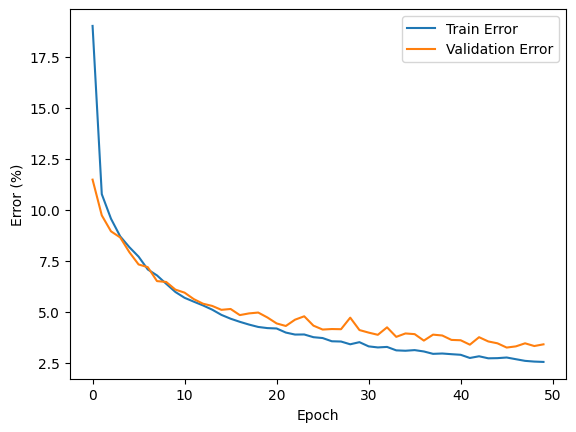

Epoch [1/50], Train Error: 19.71%, Validation Error: 11.36%
Epoch [2/50], Train Error: 10.90%, Validation Error: 9.89%
Epoch [3/50], Train Error: 9.43%, Validation Error: 8.94%
Epoch [4/50], Train Error: 8.76%, Validation Error: 8.20%
Epoch [5/50], Train Error: 8.20%, Validation Error: 7.73%
Epoch [6/50], Train Error: 7.61%, Validation Error: 7.31%
Epoch [7/50], Train Error: 7.12%, Validation Error: 6.74%
Epoch [8/50], Train Error: 6.79%, Validation Error: 6.70%
Epoch [9/50], Train Error: 6.34%, Validation Error: 6.18%
Epoch [10/50], Train Error: 6.04%, Validation Error: 6.37%
Epoch [11/50], Train Error: 5.73%, Validation Error: 5.87%
Epoch [12/50], Train Error: 5.46%, Validation Error: 5.64%
Epoch [13/50], Train Error: 5.33%, Validation Error: 5.31%
Epoch [14/50], Train Error: 5.02%, Validation Error: 5.28%
Epoch [15/50], Train Error: 4.90%, Validation Error: 5.27%
Epoch [16/50], Train Error: 4.75%, Validation Error: 5.13%
Epoch [17/50], Train Error: 4.57%, Validation Error: 4.94%
Epo

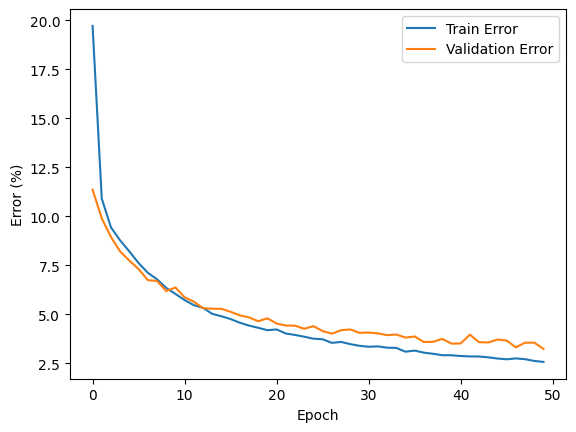

Epoch [1/50], Train Error: 19.82%, Validation Error: 11.40%
Epoch [2/50], Train Error: 10.70%, Validation Error: 10.19%
Epoch [3/50], Train Error: 9.53%, Validation Error: 9.27%
Epoch [4/50], Train Error: 8.86%, Validation Error: 8.32%
Epoch [5/50], Train Error: 8.16%, Validation Error: 8.04%
Epoch [6/50], Train Error: 7.65%, Validation Error: 7.47%
Epoch [7/50], Train Error: 7.29%, Validation Error: 7.30%
Epoch [8/50], Train Error: 6.83%, Validation Error: 6.82%
Epoch [9/50], Train Error: 6.48%, Validation Error: 6.68%
Epoch [10/50], Train Error: 6.21%, Validation Error: 6.33%
Epoch [11/50], Train Error: 5.94%, Validation Error: 6.11%
Epoch [12/50], Train Error: 5.69%, Validation Error: 5.85%
Epoch [13/50], Train Error: 5.45%, Validation Error: 5.62%
Epoch [14/50], Train Error: 5.25%, Validation Error: 5.53%
Epoch [15/50], Train Error: 5.10%, Validation Error: 5.33%
Epoch [16/50], Train Error: 5.01%, Validation Error: 5.17%
Epoch [17/50], Train Error: 4.78%, Validation Error: 5.13%
Ep

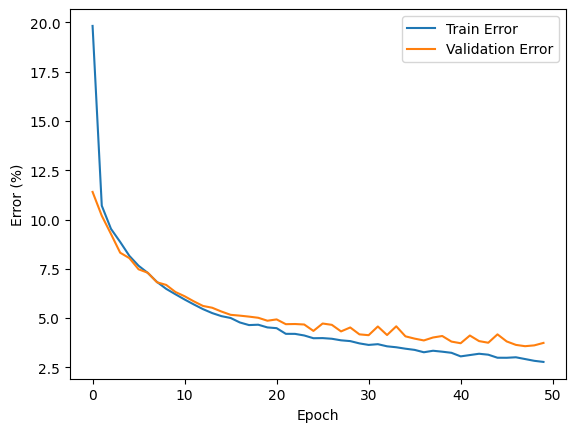

Epoch [1/50], Train Error: 19.11%, Validation Error: 11.68%
Epoch [2/50], Train Error: 10.73%, Validation Error: 9.98%
Epoch [3/50], Train Error: 9.53%, Validation Error: 9.17%
Epoch [4/50], Train Error: 8.82%, Validation Error: 8.55%
Epoch [5/50], Train Error: 8.19%, Validation Error: 7.94%
Epoch [6/50], Train Error: 7.75%, Validation Error: 7.51%
Epoch [7/50], Train Error: 7.25%, Validation Error: 7.33%
Epoch [8/50], Train Error: 6.87%, Validation Error: 6.77%
Epoch [9/50], Train Error: 6.60%, Validation Error: 6.41%
Epoch [10/50], Train Error: 6.26%, Validation Error: 6.17%
Epoch [11/50], Train Error: 5.97%, Validation Error: 6.03%
Epoch [12/50], Train Error: 5.85%, Validation Error: 6.03%
Epoch [13/50], Train Error: 5.57%, Validation Error: 5.98%
Epoch [14/50], Train Error: 5.47%, Validation Error: 5.73%
Epoch [15/50], Train Error: 5.20%, Validation Error: 5.46%
Epoch [16/50], Train Error: 5.13%, Validation Error: 5.31%
Epoch [17/50], Train Error: 4.91%, Validation Error: 5.26%
Epo

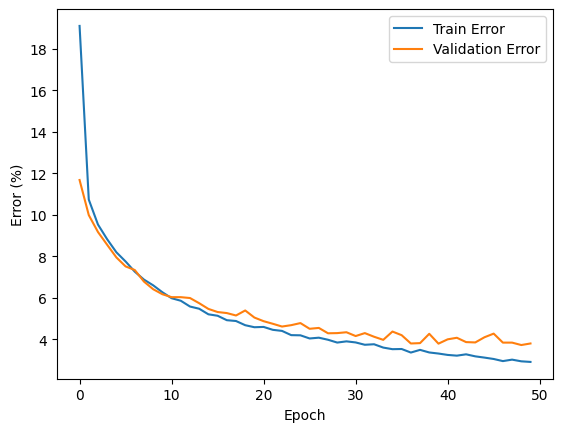

Epoch [1/50], Train Error: 18.79%, Validation Error: 11.60%
Epoch [2/50], Train Error: 10.70%, Validation Error: 10.15%
Epoch [3/50], Train Error: 9.54%, Validation Error: 8.98%
Epoch [4/50], Train Error: 8.84%, Validation Error: 8.45%
Epoch [5/50], Train Error: 8.22%, Validation Error: 8.02%
Epoch [6/50], Train Error: 7.76%, Validation Error: 7.48%
Epoch [7/50], Train Error: 7.43%, Validation Error: 7.06%
Epoch [8/50], Train Error: 6.96%, Validation Error: 6.97%
Epoch [9/50], Train Error: 6.61%, Validation Error: 6.63%
Epoch [10/50], Train Error: 6.37%, Validation Error: 6.40%
Epoch [11/50], Train Error: 6.05%, Validation Error: 6.55%
Epoch [12/50], Train Error: 5.77%, Validation Error: 6.11%
Epoch [13/50], Train Error: 5.64%, Validation Error: 5.81%
Epoch [14/50], Train Error: 5.45%, Validation Error: 5.71%
Epoch [15/50], Train Error: 5.35%, Validation Error: 5.85%
Epoch [16/50], Train Error: 5.18%, Validation Error: 5.47%
Epoch [17/50], Train Error: 4.97%, Validation Error: 5.22%
Ep

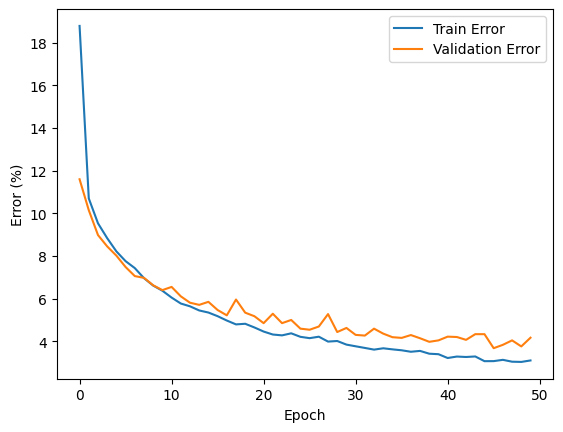

Epoch [1/50], Train Error: 19.06%, Validation Error: 11.22%
Epoch [2/50], Train Error: 10.81%, Validation Error: 10.40%
Epoch [3/50], Train Error: 9.61%, Validation Error: 9.01%
Epoch [4/50], Train Error: 8.91%, Validation Error: 8.39%
Epoch [5/50], Train Error: 8.38%, Validation Error: 7.91%
Epoch [6/50], Train Error: 7.95%, Validation Error: 7.74%
Epoch [7/50], Train Error: 7.44%, Validation Error: 7.23%
Epoch [8/50], Train Error: 7.06%, Validation Error: 7.41%
Epoch [9/50], Train Error: 6.86%, Validation Error: 6.85%
Epoch [10/50], Train Error: 6.49%, Validation Error: 6.73%
Epoch [11/50], Train Error: 6.26%, Validation Error: 6.35%
Epoch [12/50], Train Error: 6.05%, Validation Error: 6.41%
Epoch [13/50], Train Error: 5.92%, Validation Error: 6.26%
Epoch [14/50], Train Error: 5.65%, Validation Error: 5.97%
Epoch [15/50], Train Error: 5.57%, Validation Error: 5.69%
Epoch [16/50], Train Error: 5.36%, Validation Error: 5.74%
Epoch [17/50], Train Error: 5.33%, Validation Error: 5.42%
Ep

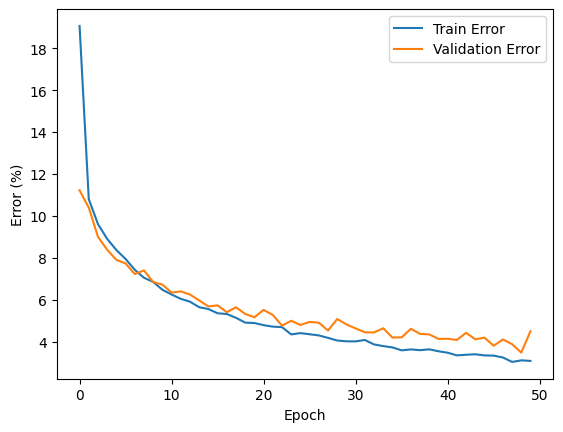

In [4]:
b = [0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19]
for i in b:
    train(i,50)